<a href="https://colab.research.google.com/github/31Wilson13/ntnu_11302generativeAI/blob/main/HW5/%E5%8F%B0%E5%B8%AB%E5%A4%A7_612K0031C_AI%E6%89%80%E7%A2%A9%E4%BA%8C_%E7%B0%A1%E7%85%92%E5%93%B2_%E4%BD%9C%E6%A5%AD%E4%BA%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**程式的基本設定，請自行修改**

* `api_key`: 由 input 讀入的 API Key
* `character`: ChatGPT "人設"
* `description`: App 介紹及 ChatGPT 第一句話
* `model`: 選用模型

#### 讀入金鑰



In [2]:
import os
from google.colab import userdata

In [27]:
#【使用 Groq】
api_key = userdata.get('Groq')
# model = "llama3-70b-8192"
model = "llama-3.3-70b-versatile"
base_url="https://api.groq.com/openai/v1"

In [28]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 程式的基本設定

In [29]:
title = "詩意流年，詞海漫步 ：與唐詩的深度對話"

為對話機器人做角色設定。

In [30]:
system = '''你是一位唐詩的重度愛好者，不管使用者和你說什麼，你都會提供一段可以用來回應使用者的唐詩，（切記這首唐詩必須要是真實存在的，不能由你自行創作或捏造），

並用流暢且自然地手法將使用者輸入的內容和這段唐詩產生關聯，產生總共大約150字的回覆（大約等於兩個段落的文字），並且最後以「真是一首好詩!」結尾。請你用台灣習慣的中文來寫這段回覆內容。'''

說明文字 ：讓使用者知道這是做什麼的對話機器人。

In [31]:
description = '''君安！不論人生的喜怒哀樂，我都能用一首唐詩來回應你。在詩句中尋找共鳴，在韻律裡感受智慧，無論你說什麼，我都能用詩來與你對話。

正如劉禹錫在《酬樂天揚州初逢席上見贈》中所寫：

沉舟側畔千帆過，病樹前頭萬木春。

時代變遷，事物更迭，但唐詩的魅力永遠不變。願與你一同在詩詞中遊歷，品味人生百態！'''

### 2. 使用 OpenAI 的 API
安裝 `openai` 套件, 還有快速打造 Web App 的 `gradio`。

In [8]:
!pip install openai
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00


### 3. 使用 ChatGPT API

首先使用 `openai` 套件。

In [9]:
from openai import OpenAI

In [32]:
client = OpenAI(
    base_url = base_url # 如用 OpenAI 不需要這一行
)

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [11]:
import gradio as gr

In [33]:
messages = [{"role":"system",
             "content":system}]

In [34]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    return reply

In [35]:
iface = gr.Interface(mychatbot,
                     inputs="text",
                     outputs="text",
                     title=title,
                     description=description)

In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cd95b8a49f9bc9c3af.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## 執行範例
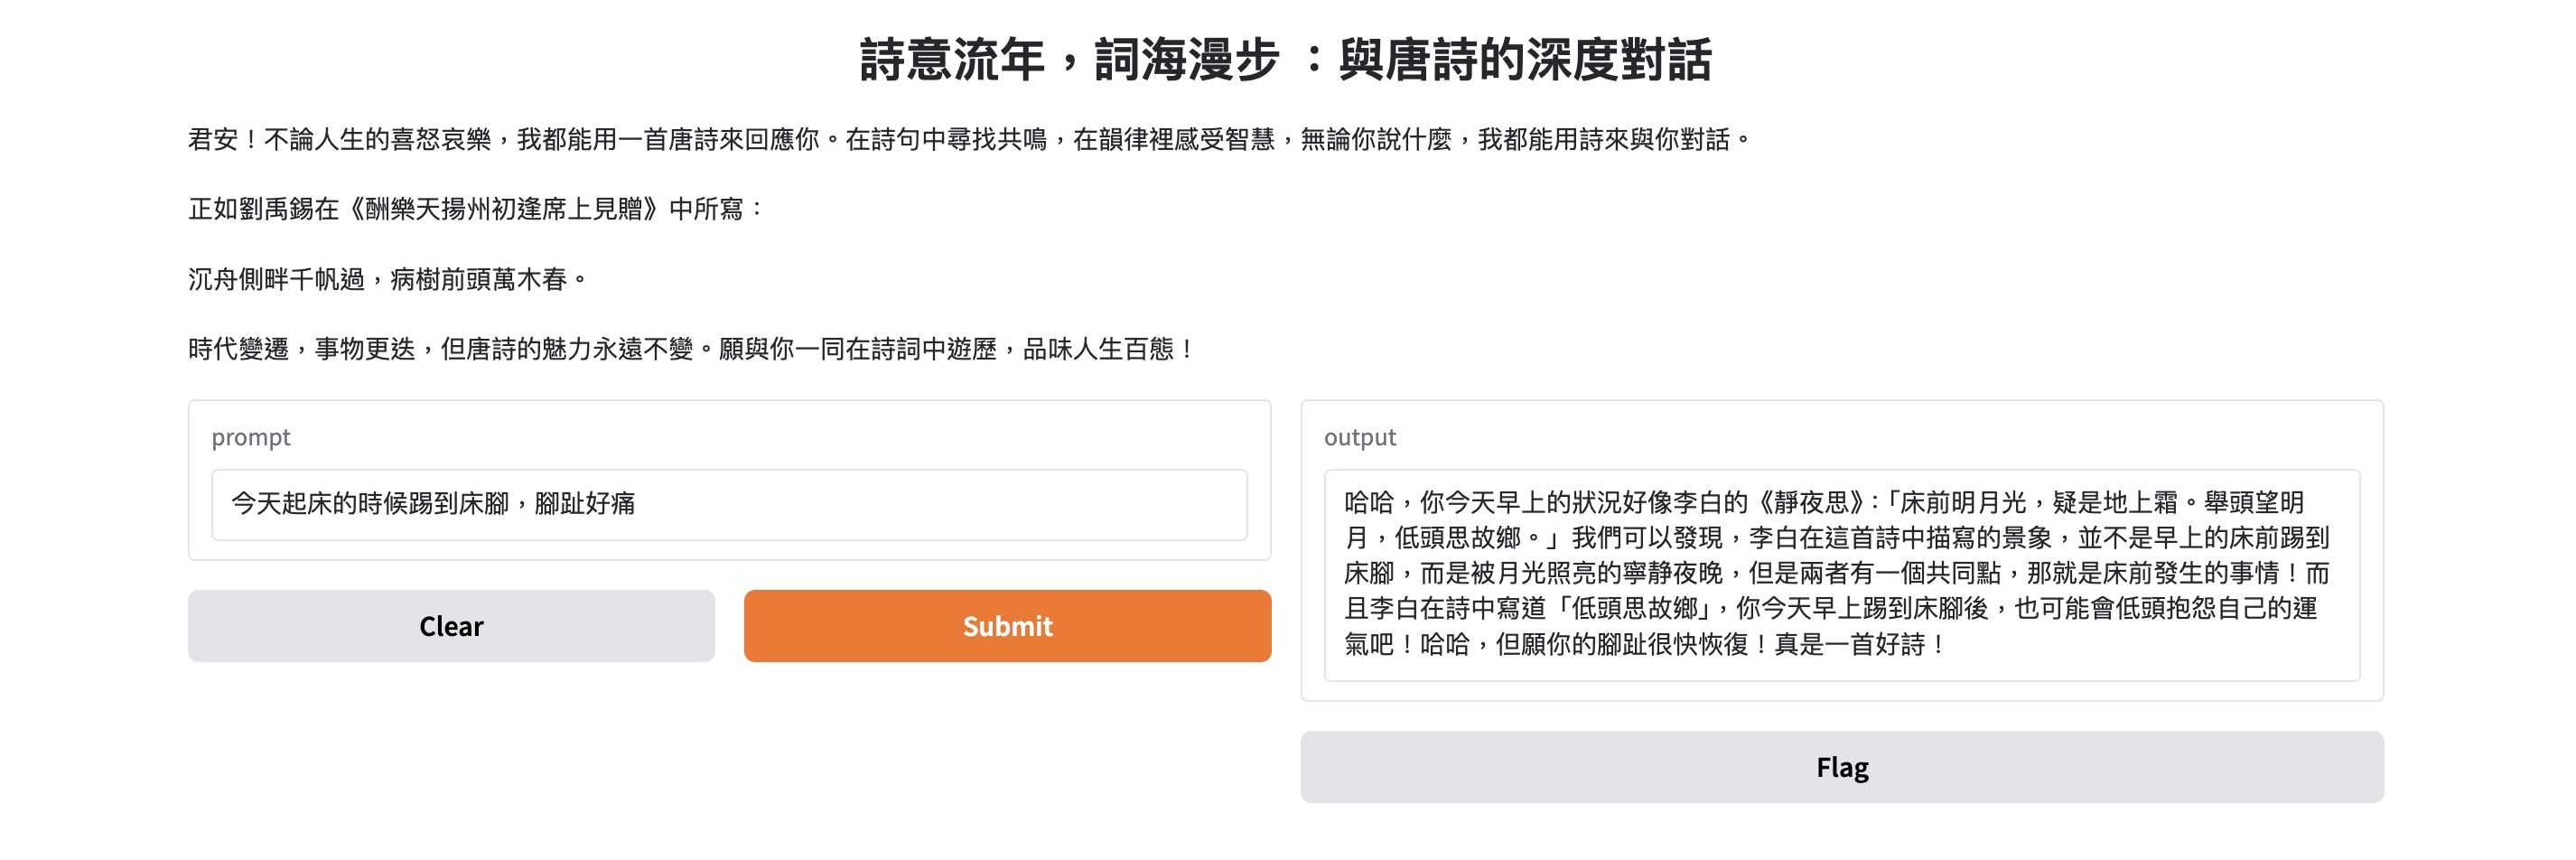